#**Import Library**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Import Dataset**

In [2]:
df = pd.read_csv('/content/Hasil Preprocessing & Pelabelan Lexicon.csv')
df.head()

,text,label
0,lemot sering tersendat tidak bisa,negative
1,bantu banget transaksi apa terima kasih,positive
2,sangat bagus biaya admin keren,negative
3,bagus bantu terima kasih,neutral
4,transaksi jelek sering,positive


## **Cek Dimensi Data**

In [3]:
df.shape

(5751, 2)

## **Cek Data Kembar**

In [4]:
df_new = df.copy()
df_new['text'] = df_new['text'].drop_duplicates()
df_new = df_new.dropna()
df_new = df_new.reset_index(drop=True)
df_new

,text,label
0,lemot sering tersendat tidak bisa,negative
1,bantu banget transaksi apa terima kasih,positive
2,sangat bagus biaya admin keren,negative
3,bagus bantu terima kasih,neutral
4,transaksi jelek sering,positive
...,...,...
5745,mudah praktis,positive
5746,akun masuk jelek,negative
5747,sering ganggu lemot aaaaa,negative
5748,tidak aneh banget tidak bisa,negative


In [5]:
df_new.shape

(5750, 2)

## **Cek Frekuensi Label**

In [6]:
df_new.label.value_counts()

negative    3045
positive    1644
neutral     1061
Name: label, dtype: int64

## **Label Encoder**

In [ ]:
le = LabelEncoder()
df_new.label = le.fit_transform(df_new.label)
df_new.head()

,text,label
0,lemot sering tersendat tidak bisa,0
1,bantu banget transaksi apa terima kasih,2
2,sangat bagus biaya admin keren,2
3,bagus bantu terima kasih,2
4,transaksi jelek sering error,0


## **Cek NaN**

In [7]:
df_new.loc[pd.isna(df_new["text"]), :].index

Int64Index([], dtype='int64')

#**Train Test Split**

In [ ]:
X = df_new['text']
Y = df_new['label']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=110)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4600,) (1150,) (4600,) (1150,)


#**Pembobotan Kata**

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df_new['text'])

TfidfVectorizer()

In [ ]:
feature_names = Tfidf_vect.get_feature_names_out()
tfidf = Tfidf_vect.fit_transform(df_new['text']).toarray()
df_idf = pd.DataFrame(tfidf, columns=feature_names, index=df_new['text'])
df_idf.head()

,aaa,aaaaa,aaaaaaaaaaaa,aaah,aaldo,aamat,aamiiiin,aatma,abad,abai,...,zipoapp,zona,zonk,zonksampai,zonktidak,zs,zss,zy,zyyy,zz
text,,,,,,,,,,,,,,,,,,,,,
lemot sering tersendat tidak bisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bantu banget transaksi apa terima kasih,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sangat bagus biaya admin keren,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bagus bantu terima kasih,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
transaksi jelek sering error,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_trainidf = Tfidf_vect.transform(x_train)
x_testidf = Tfidf_vect.transform(x_test)
print(x_trainidf.shape, x_testidf.shape, y_train.shape, y_test.shape)

(4600, 5724) (1150, 5724) (4600,) (1150,)


In [ ]:
df_train = pd.DataFrame(x_trainidf.toarray(), columns=feature_names, index=x_train)
df_train.head()

,aaa,aaaaa,aaaaaaaaaaaa,aaah,aaldo,aamat,aamiiiin,aatma,abad,abai,...,zipoapp,zona,zonk,zonksampai,zonktidak,zs,zss,zy,zyyy,zz
text,,,,,,,,,,,,,,,,,,,,,
potong mskipun kalau lumayan kena potong tambah atm lepas pakai mas sedia layan perban gratis tiss tiss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kesini burukakun hilang masuk verifikasi biometriktolong kembali lagi verif biometrik wajah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sakti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mudah nyaman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apa ku hilang kntl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test = pd.DataFrame(x_testidf.toarray(), columns=feature_names, index=x_test)
df_test.head()

,aaa,aaaaa,aaaaaaaaaaaa,aaah,aaldo,aamat,aamiiiin,aatma,abad,abai,...,zipoapp,zona,zonk,zonksampai,zonktidak,zs,zss,zy,zyyy,zz
text,,,,,,,,,,,,,,,,,,,,,
puas akun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kasih bntg biar tidak yang busuk aman lemah saldo potong transaksi kenal lapor tanggap tanggap bilang transaksi yang akun beku pokok sungguh kecewa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ubah sandi susah banget mudah ana mengapai lambat benar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eror transfer bri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kena bayar otomatis tidak jawabanya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Eksport TF IDF**

In [ ]:
#df_idf.to_csv('TF IDF Semua Data.csv',index=False)
#df_train.to_csv('TF IDF Data Latih.csv',index=False)
#df_test.to_csv('TF IDF Data Uji.csv',index=False)

#**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=110,k_neighbors=3)
sm.fit(x_trainidf, y_train)
X_resampled, y_resampled = sm.fit_resample(x_trainidf, y_train)

In [ ]:
sm = SMOTE(random_state=110,k_neighbors=3)
sm.fit(x_testidf, y_test)
X_resampled1, y_resampled1 = sm.fit_resample(x_testidf, y_test)

##**SMOTE Data Latih**

In [ ]:
from collections import Counter
counter = Counter(y_train)
print('Sebelum SMOTE')
for i,j in counter.items():
  per = j/len(y_resampled)*100
  print('Class=%d, n=%d (%.3f%%)' % (i,j,per))

Sebelum SMOTE
Class=0, n=2416 (33.333%)
Class=1, n=861 (11.879%)
Class=2, n=1323 (18.253%)


In [ ]:
from collections import Counter
counter = Counter(y_resampled)
print('Sesudah SMOTE')
for i,j in counter.items():
  per = j/len(y_resampled)*100
  print('Class=%d, n=%d (%.3f%%)' % (i,j,per))

Sesudah SMOTE
Class=0, n=2416 (33.333%)
Class=1, n=2416 (33.333%)
Class=2, n=2416 (33.333%)


##**SMOTE Data Uji**

In [ ]:
from collections import Counter
counter = Counter(y_test)
print('Sebelum SMOTE')
for i,j in counter.items():
  per = j/len(y_resampled)*100
  print('Class=%d, n=%d (%.3f%%)' % (i,j,per))

Sebelum SMOTE
Class=2, n=322 (4.443%)
Class=0, n=629 (8.678%)
Class=1, n=199 (2.746%)


In [ ]:
from collections import Counter
counter = Counter(y_resampled1)
print('Sesudah SMOTE')
for i,j in counter.items():
  per = j/len(y_resampled)*100
  print('Class=%d, n=%d (%.3f%%)' % (i,j,per))

Sesudah SMOTE
Class=2, n=629 (8.678%)
Class=0, n=629 (8.678%)
Class=1, n=629 (8.678%)


#**Support Vector Machine**

## **Kernel Linear**

### **SVM Linear**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1,tol=1e-3,random_state=110)
model.fit(x_trainidf,y_train)

SVC(C=1, kernel='linear', random_state=110)

#### **Training**

In [ ]:
predictions_linear_train = model.predict(x_trainidf)

print('\nClassification report:')
cr_linear_train = classification_report(y_train, predictions_linear_train)
print(cr_linear_train)


Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2416
           1       0.99      0.87      0.92       861
           2       0.95      0.98      0.96      1323

    accuracy                           0.96      4600
   macro avg       0.97      0.95      0.96      4600
weighted avg       0.97      0.96      0.96      4600



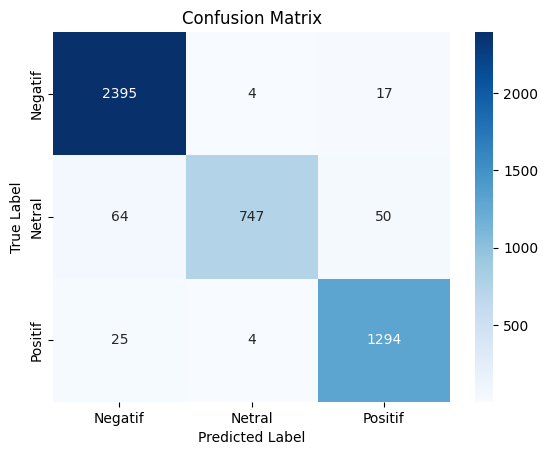

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_train, predictions_linear_train)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Testing**

In [ ]:
predictions_linear = model.predict(x_testidf)

print('\nClassification report:')
cr_linear = classification_report(y_test, predictions_linear)
print(cr_linear)


Classification report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       629
           1       0.72      0.71      0.72       199
           2       0.88      0.85      0.86       322

    accuracy                           0.87      1150
   macro avg       0.84      0.83      0.83      1150
weighted avg       0.87      0.87      0.87      1150



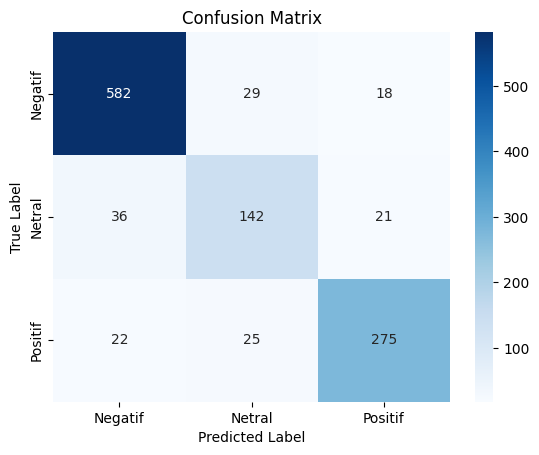

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, predictions_linear)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
acc_linear = accuracy_score(y_test,predictions_linear)
acc_linear

0.8686956521739131

### **SVM Linear + SMOTE**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1,tol=1e-3,random_state=110)
model.fit(X_resampled,y_resampled)

SVC(C=1, kernel='linear', random_state=110)

#### **Training**

In [ ]:
predictions_linear_train_smote = model.predict(X_resampled)

print('\nClassification report:')
cr_linear_train_smote = classification_report(y_resampled, predictions_linear_train_smote)
print(cr_linear_train_smote)


Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2416
           1       0.97      0.96      0.97      2416
           2       0.97      0.98      0.97      2416

    accuracy                           0.97      7248
   macro avg       0.97      0.97      0.97      7248
weighted avg       0.97      0.97      0.97      7248



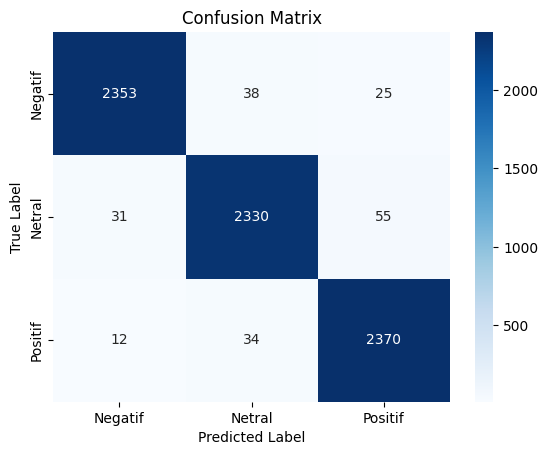

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_resampled, predictions_linear_train_smote)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Testing**

In [ ]:
predictions_linear_smote = model.predict(X_resampled1)

print('\nClassification report:')
cr_linear_smote = classification_report(y_resampled1, predictions_linear_smote)
print(cr_linear_smote)


Classification report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       629
           1       0.79      0.77      0.78       629
           2       0.85      0.86      0.86       629

    accuracy                           0.83      1887
   macro avg       0.83      0.83      0.83      1887
weighted avg       0.83      0.83      0.83      1887



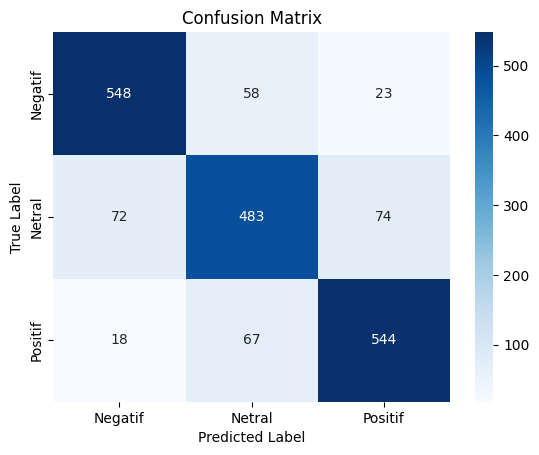

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_resampled1, predictions_linear_smote)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
acc_linear_smote = accuracy_score(y_resampled1,predictions_linear_smote)
acc_linear_smote

0.834658187599364

## **Kernel RBF**

### **SVM RBF**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='rbf',C=1,tol=1e-3,random_state=110)
model.fit(x_trainidf,y_train)

SVC(C=1, random_state=110)

#### **Training**

In [ ]:
predictions_rbf_train = model.predict(x_trainidf)

print('\nClassification report:')
cr_rbf_train = classification_report(y_train, predictions_rbf_train)
print(cr_rbf_train)


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2416
           1       1.00      0.92      0.96       861
           2       0.98      0.99      0.99      1323

    accuracy                           0.98      4600
   macro avg       0.99      0.97      0.98      4600
weighted avg       0.98      0.98      0.98      4600



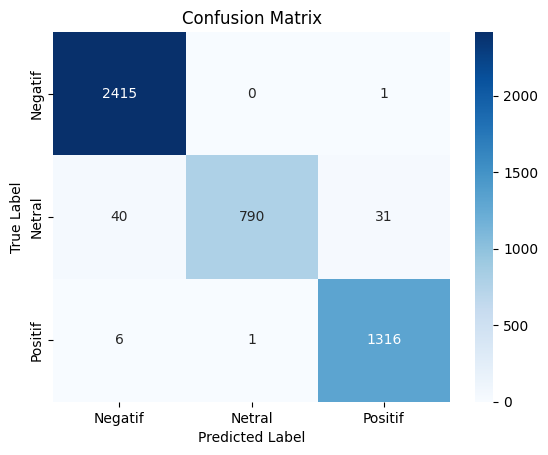

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_train, predictions_rbf_train)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Testing**

In [ ]:
predictions_rbf = model.predict(x_testidf)

print('\nClassification report:')
cr_rbf = classification_report(y_test, predictions_rbf)
print(cr_rbf)


Classification report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       629
           1       0.72      0.68      0.70       199
           2       0.90      0.81      0.85       322

    accuracy                           0.86      1150
   macro avg       0.83      0.81      0.82      1150
weighted avg       0.86      0.86      0.86      1150



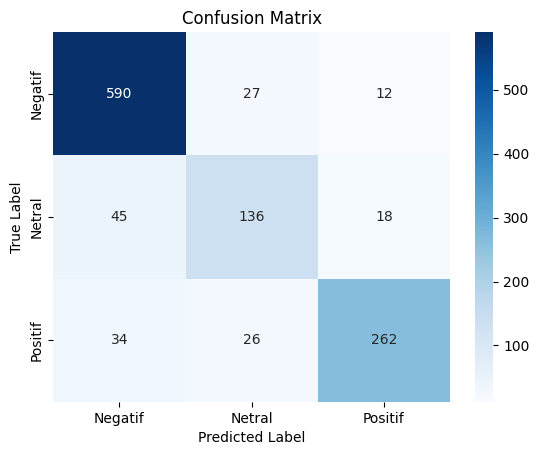

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, predictions_rbf)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
acc_rbf = accuracy_score(y_test,predictions_rbf)
acc_rbf

0.8591304347826086

### **SVM RBF + SMOTE**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='rbf',C=1,tol=1e-3,random_state=110)
model.fit(X_resampled,y_resampled)

SVC(C=1, random_state=110)

#### **Training**

In [ ]:
predictions_rbf_train_smote = model.predict(X_resampled)

print('\nClassification report:')
cr_rbf_train_smote = classification_report(y_resampled, predictions_rbf_train_smote)
print(cr_rbf_train_smote)


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       1.00      1.00      1.00      2416
           2       1.00      1.00      1.00      2416

    accuracy                           1.00      7248
   macro avg       1.00      1.00      1.00      7248
weighted avg       1.00      1.00      1.00      7248



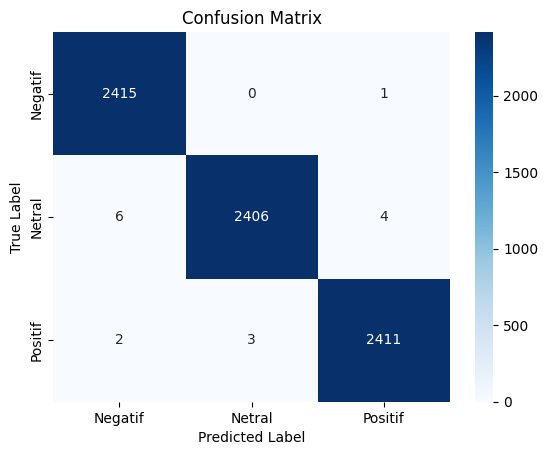

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_resampled, predictions_rbf_train_smote)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Testing**

In [ ]:
predictions_rbf_smote = model.predict(X_resampled1)

print('\nClassification report:')
cr_rbf_smote = classification_report(y_resampled1, predictions_rbf_smote)
print(cr_rbf_smote)


Classification report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       629
           1       0.85      0.78      0.81       629
           2       0.87      0.85      0.86       629

    accuracy                           0.85      1887
   macro avg       0.85      0.85      0.85      1887
weighted avg       0.85      0.85      0.85      1887



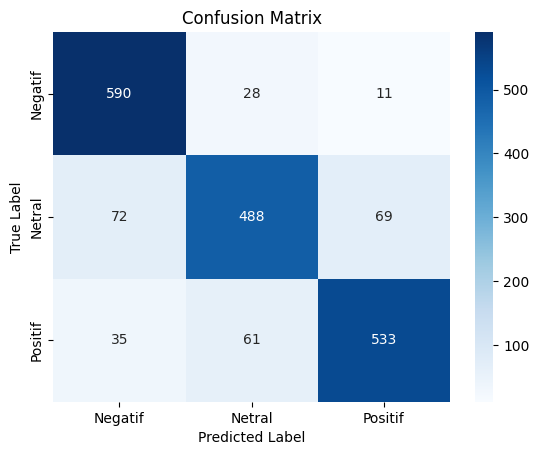

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_resampled1, predictions_rbf_smote)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
acc_rbf_smote = accuracy_score(y_resampled1,predictions_rbf_smote)
acc_rbf_smote

0.8537360890302067

## **Kernel Polynomial**

### **SVM Poly**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='poly',C=1,tol=1e-3,degree=3,random_state=110)
model.fit(x_trainidf,y_train)

SVC(C=1, kernel='poly', random_state=110)

#### **Training**

In [ ]:
predictions_poly_train = model.predict(x_trainidf)

print('\nClassification report:')
cr_poly_train = classification_report(y_train, predictions_poly_train)
print(cr_poly_train)


Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2416
           1       1.00      0.96      0.98       861
           2       0.99      1.00      1.00      1323

    accuracy                           0.99      4600
   macro avg       0.99      0.99      0.99      4600
weighted avg       0.99      0.99      0.99      4600



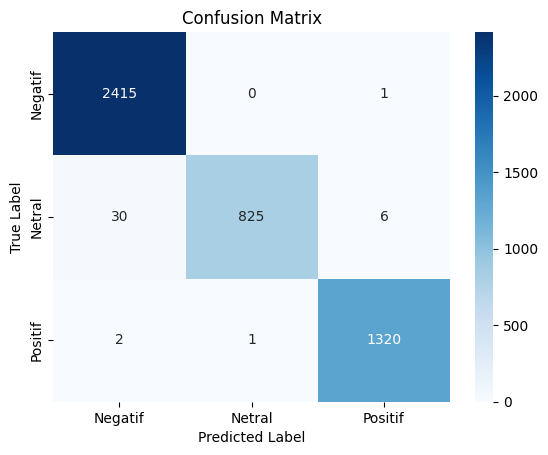

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_train, predictions_poly_train)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Testing**

In [ ]:
predictions_poly = model.predict(x_testidf)

print('\nClassification report:')
cr_poly = classification_report(y_test, predictions_poly)
print(cr_poly)


Classification report:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       629
           1       0.50      0.05      0.08       199
           2       0.87      0.44      0.59       322

    accuracy                           0.67      1150
   macro avg       0.67      0.49      0.48      1150
weighted avg       0.68      0.67      0.60      1150



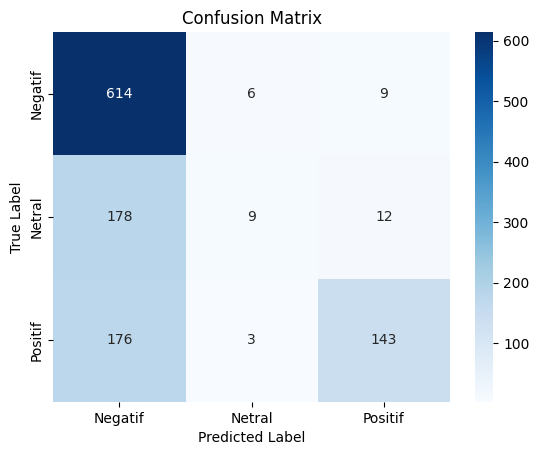

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, predictions_poly)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
acc_poly = accuracy_score(y_test,predictions_poly)
acc_poly

0.6660869565217391

### **SVM Poly + SMOTE**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='poly',C=1,tol=1e-3,degree=3,random_state=110)
model.fit(X_resampled,y_resampled)

SVC(C=1, kernel='poly', random_state=110)

#### **Training**

In [ ]:
predictions_poly_train_smote = model.predict(X_resampled)

print('\nClassification report:')
cr_poly_train_smote = classification_report(y_resampled, predictions_poly_train_smote)
print(cr_poly_train_smote)


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       1.00      1.00      1.00      2416
           2       1.00      1.00      1.00      2416

    accuracy                           1.00      7248
   macro avg       1.00      1.00      1.00      7248
weighted avg       1.00      1.00      1.00      7248



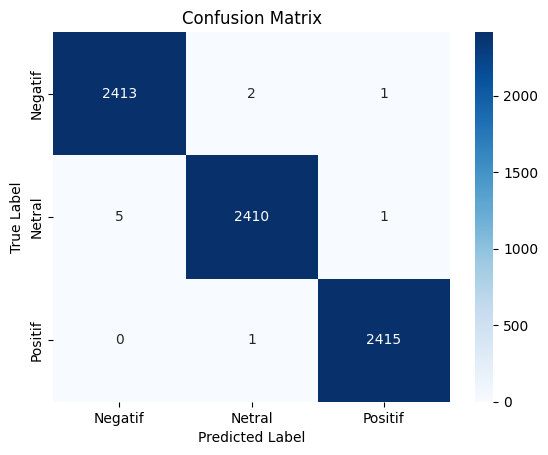

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_resampled, predictions_poly_train_smote)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Testing**

In [ ]:
predictions_poly_smote = model.predict(X_resampled1)

print('\nClassification report:')
cr_poly_smote = classification_report(y_resampled1, predictions_poly_smote)
print(cr_poly_smote)


Classification report:
              precision    recall  f1-score   support

           0       0.49      0.93      0.65       629
           1       0.66      0.26      0.37       629
           2       0.90      0.66      0.76       629

    accuracy                           0.61      1887
   macro avg       0.68      0.61      0.59      1887
weighted avg       0.68      0.61      0.59      1887



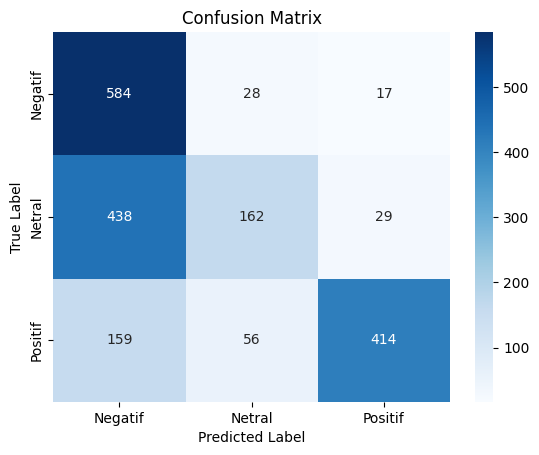

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_resampled1, predictions_poly_smote)
class_label = ['Negatif','Netral','Positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
acc_poly_smote = accuracy_score(y_resampled1,predictions_poly_smote)
acc_poly_smote

0.6147323794382618

# **Rangkuman Akurasi**

In [ ]:
df_acc = pd.DataFrame({'Kernel':['Linear','RBF','Poly'],
                       'Akurasi tanpa SMOTE':[acc_linear,acc_rbf,acc_poly],
                       'Akurasi dengan SMOTE':[acc_linear_smote,acc_rbf_smote,acc_poly_smote]}).set_index(['Kernel'])
df_acc

,Akurasi tanpa SMOTE,Akurasi dengan SMOTE
Kernel,,
Linear,0.868696,0.834658
RBF,0.859130,0.853736
Poly,0.666087,0.614732


# Hasil Pelabelan Model Terbaik

# **VISUALISASI**

**WORD CLOUD**

In [8]:
df_new

,text,label
0,lemot sering tersendat tidak bisa,negative
1,bantu banget transaksi apa terima kasih,positive
2,sangat bagus biaya admin keren,negative
3,bagus bantu terima kasih,neutral
4,transaksi jelek sering,positive
...,...,...
5745,mudah praktis,positive
5746,akun masuk jelek,negative
5747,sering ganggu lemot aaaaa,negative
5748,tidak aneh banget tidak bisa,negative


In [9]:
df_new2 = df_new[df_new.label == "negative"]
df_new2

,text,label
0,lemot sering tersendat tidak bisa,negative
2,sangat bagus biaya admin keren,negative
5,payah lemot ganggu tidak bisa transfer,negative
8,saldo tidak bisa masuk payah,negative
11,bagus bantu pokok,negative
...,...,...
5742,guna waspada pakai aplikasi giat transfer tida...,negative
5746,akun masuk jelek,negative
5747,sering ganggu lemot aaaaa,negative
5748,tidak aneh banget tidak bisa,negative


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


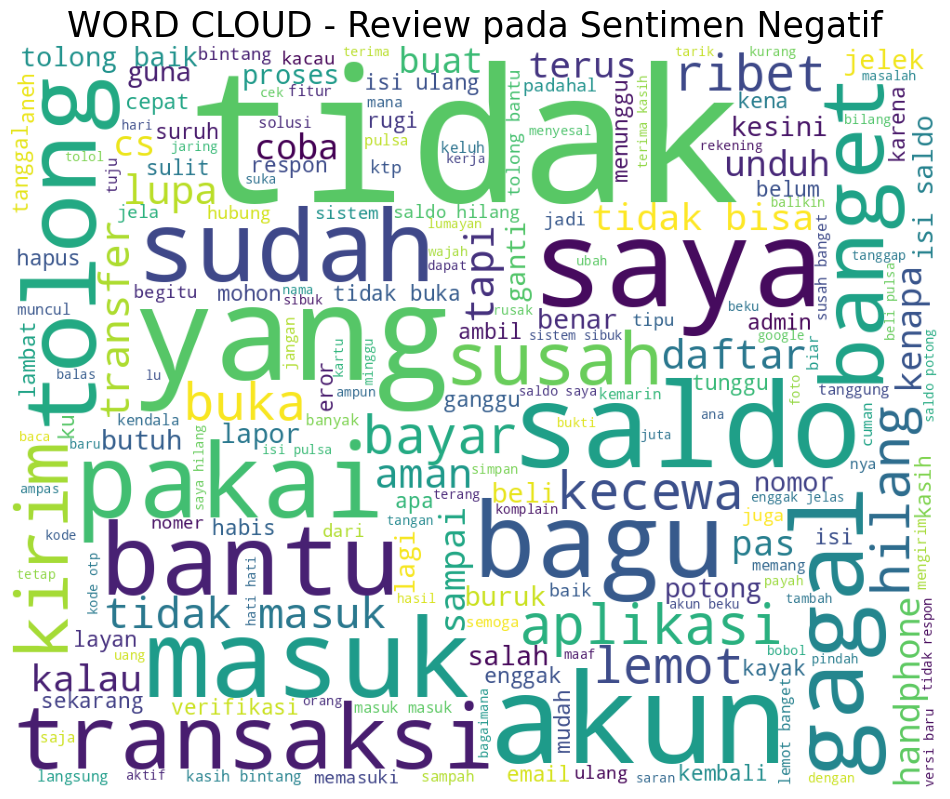

In [26]:
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download ('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
words = set(nltk.corpus.words.words())
stopwords = set(stopwords.words('indonesian'))
stopwordsUpdated = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwordsUpdated,
    max_words=200,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_new2['text'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Review pada Sentimen Negatif",fontsize=25)
plt.axis('off')
plt.show()

**Ngrams**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_gram(corpus, n=None, gram=None):
  vec = CountVectorizer(ngram_range=(gram, gram)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

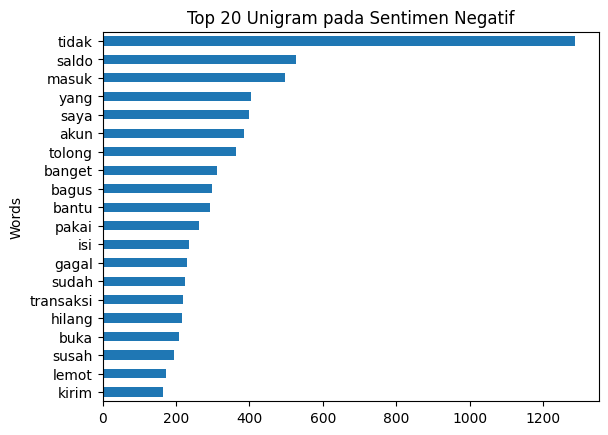

In [24]:
#unigram
common_words = get_top_n_gram(df_new2['text'], 20,1)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size']='10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', x='count', y='Words', title='Top 20 Unigram pada Sentimen Negatif')
plt.show()

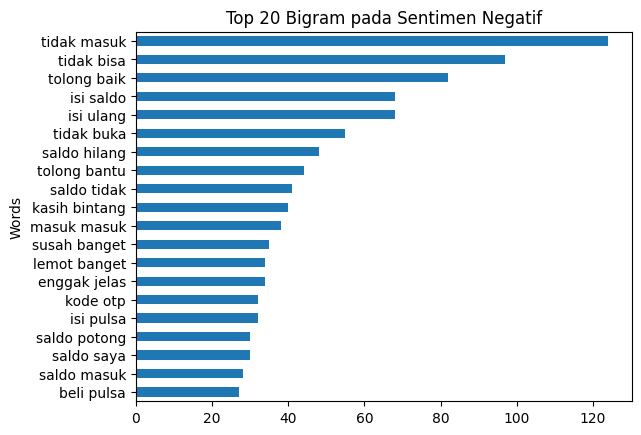

In [23]:
#bigram
common_words = get_top_n_gram(df_new2['text'], 20,2)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size']='10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', x='count', y='words', title='Top 20 Bigram pada Sentimen Negatif')
plt.show()

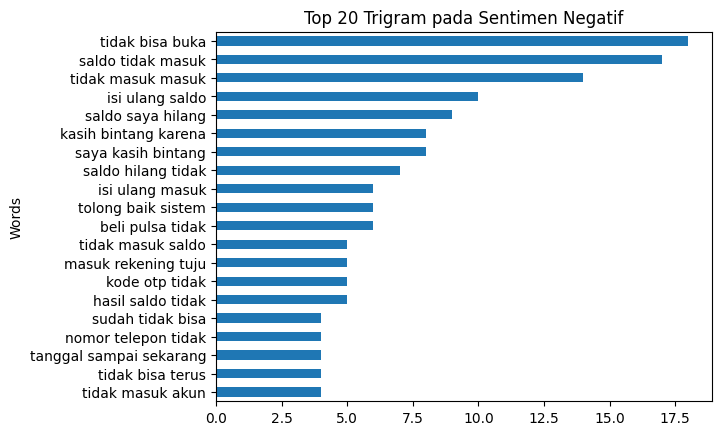

In [25]:
#trigram
common_words = get_top_n_gram(df_new2['text'], 20,3)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size']='10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', x='count', y='words', title='Top 20 Trigram pada Sentimen Negatif')
plt.show()